In [40]:
## Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### From the data provided on Hollywood movies:
### 1. Find the highest rated movie in the “Quest” story type.

In [2]:
## Reading data from file into dataframe

df_movies=pd.read_csv(r"./datasets/HollywoodMovies.csv")

In [3]:
df_movies.head()

,Movie,LeadStudio,RottenTomatoes,AudienceScore,Story,Genre,TheatersOpenWeek,OpeningWeekend,BOAvgOpenWeekend,DomesticGross,ForeignGross,WorldGross,Budget,Profitability,OpenProfit,Year
0,Spider-Man 3,Sony,61.0,54.0,Metamorphosis,Action,4252.0,151.1,35540.0,336.53,554.34,890.87,258.0,345.30,58.57,2007
1,Shrek the Third,Paramount,42.0,57.0,Quest,Animation,4122.0,121.6,29507.0,322.72,476.24,798.96,160.0,499.35,76.00,2007
2,Transformers,Paramount,57.0,89.0,Monster Force,Action,4011.0,70.5,17577.0,319.25,390.46,709.71,150.0,473.14,47.00,2007
3,Pirates of the Caribbean: At World's End,Disney,45.0,74.0,Rescue,Action,4362.0,114.7,26302.0,309.42,654.00,963.42,300.0,321.14,38.23,2007
4,Harry Potter and the Order of the Phoenix,Warner Bros,78.0,82.0,Quest,Adventure,4285.0,77.1,17998.0,292.00,647.88,939.89,150.0,626.59,51.40,2007


In [4]:
df_movies.describe()

,RottenTomatoes,AudienceScore,TheatersOpenWeek,OpeningWeekend,BOAvgOpenWeekend,DomesticGross,ForeignGross,WorldGross,Budget,Profitability,OpenProfit,Year
count,913.000000,907.000000,949.000000,969.000000,945.000000,970.000000,876.000000,914.000000,897.000000,896.000000,895.000000,970.000000
mean,51.707558,61.271224,2495.246575,20.620826,8562.593651,68.162544,101.237419,169.009945,56.117168,384.620100,62.223575,2010.236082
std,26.821268,16.602457,1164.223356,25.338689,10645.135565,80.409969,155.987696,227.744380,53.755914,631.666012,159.713218,1.954840
min,0.000000,19.000000,1.000000,0.010000,28.000000,0.060000,0.000000,0.100000,0.000000,2.300000,0.160000,2007.000000
25%,28.000000,49.000000,2054.000000,5.300000,3528.000000,17.565000,16.667500,38.357500,20.000000,150.020000,19.505000,2009.000000
50%,52.000000,61.000000,2798.000000,13.150000,5983.000000,40.415000,46.655000,88.180000,35.000000,254.820000,34.610000,2010.000000
75%,75.000000,74.000000,3285.000000,26.200000,9790.000000,89.252500,111.908750,202.310000,75.000000,417.987500,58.375000,2012.000000
max,99.000000,96.000000,4468.000000,207.440000,147262.000000,760.500000,2021.000000,2781.500000,300.000000,10175.850000,3373.000000,2013.000000


In [5]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Movie             970 non-null    object 
 1   LeadStudio        961 non-null    object 
 2   RottenTomatoes    913 non-null    float64
 3   AudienceScore     907 non-null    float64
 4   Story             641 non-null    object 
 5   Genre             691 non-null    object 
 6   TheatersOpenWeek  949 non-null    float64
 7   OpeningWeekend    969 non-null    float64
 8   BOAvgOpenWeekend  945 non-null    float64
 9   DomesticGross     970 non-null    float64
 10  ForeignGross      876 non-null    float64
 11  WorldGross        914 non-null    float64
 12  Budget            897 non-null    float64
 13  Profitability     896 non-null    float64
 14  OpenProfit        895 non-null    float64
 15  Year              970 non-null    int64  
dtypes: float64(11), int64(1), object(4)
memory u

In [6]:
df_movies.isnull().sum()

Movie                 0
LeadStudio            9
RottenTomatoes       57
AudienceScore        63
Story               329
Genre               279
TheatersOpenWeek     21
OpeningWeekend        1
BOAvgOpenWeekend     25
DomesticGross         0
ForeignGross         94
WorldGross           56
Budget               73
Profitability        74
OpenProfit           75
Year                  0
dtype: int64

In [7]:
highest_rating = max(df_movies[df_movies["Story"] == "Quest"]["AudienceScore"])

In [8]:
## Movies with highest rating by Audience
df_movies[(df_movies["Story"] == "Quest") & (df_movies["AudienceScore"] == highest_rating)]["Movie"].to_list()

['Harry Potter and the Deathly Hallows Part 1', 'The Muppets']

### 2. Find the genre in which there has been the greatest number of movie releases

In [24]:
df_movies["Genre"].value_counts()

Comedy         177
Action         166
Drama          109
Horror          52
Animation       51
Thriller        35
Adventure       30
Romance         20
Crime           15
Biography       14
Documentary      7
Fantasy          6
Mystery          5
Musical          4
Name: Genre, dtype: int64

#### Comedy Movies has greatest number of moview releases

### 3. Print the names of the top five movies with the costliest budgets.

In [53]:
## Sorting the movie based on budget
df_movies_sort = df_movies.sort_values(by=['Budget'], ascending=False)

In [63]:
df_movies_sort[["Movie","Budget"]].head(10)

,Movie,Budget
3,Pirates of the Caribbean: At World's End,300.0
468,Tangled,260.0
0,Spider-Man 3,258.0
778,The Dark Knight Rises,250.0
241,Harry Potter and the Half-Blood Prince,250.0
586,Pirates of the Caribbean:On Stranger Tides,250.0
710,John Carter,250.0
239,Avatar,237.0
99,Quantum of Solace,230.0
770,The Amazing Spider-Man,230.0


In [62]:
## Top 5 movies with heighest budget
df_movies_sort.head(5).Movie.to_list()

["Pirates of the Caribbean: At World's End",
 'Tangled',
 'Spider-Man 3',
 'The Dark Knight Rises',
 'Harry Potter and the Half-Blood Prince']

### 4. Is there any correspondence between the critics’ evaluation of a movie and its
### acceptance by the public? Find out, by plotting the net profitability of a movie
### against the ratings it receives on Rotten Tomatoes.

In [39]:
df_movies[["RottenTomatoes","Profitability"]].head()

,RottenTomatoes,Profitability
0,61.0,345.30
1,42.0,499.35
2,57.0,473.14
3,45.0,321.14
4,78.0,626.59


In [41]:
X=df_movies["RottenTomatoes"]
Y=df_movies["Profitability"]

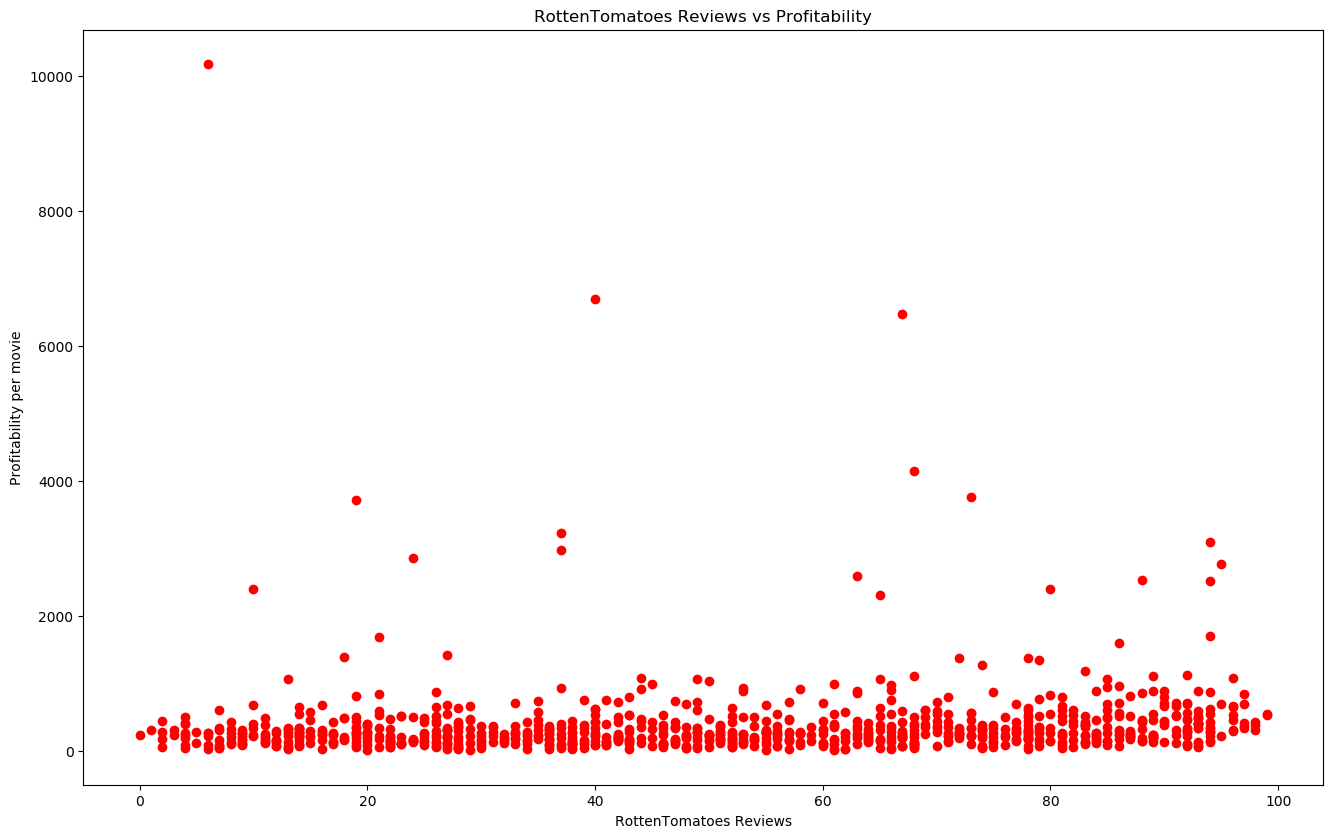

In [51]:
plt.figure(figsize=(16, 10), dpi=100)
plt.scatter(X,Y,marker= 'o',color='red')
plt.xlabel("RottenTomatoes Reviews")
plt.ylabel("Profitability per movie")
plt.title("RottenTomatoes Reviews vs Profitability")
plt.show()

#### The above plot doesnot give better visibility of relationship between Reviews and profitability. So limiting the value of y-axis for better view

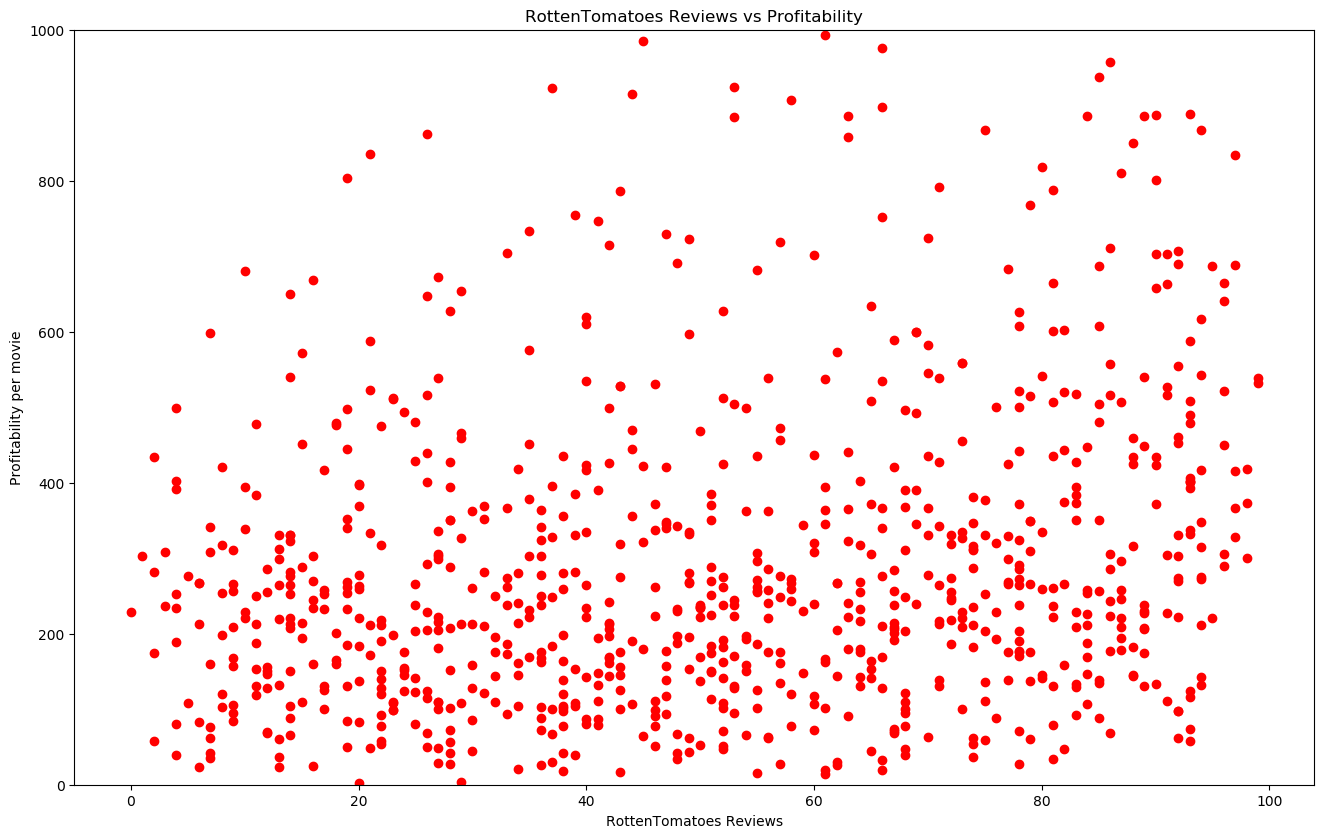

In [50]:
plt.figure(figsize=(16, 10), dpi=100)
plt.scatter(X,Y,marker= 'o',color='red')
plt.ylim(0,1000)
plt.xlabel("RottenTomatoes Reviews")
plt.ylabel("Profitability per movie")
plt.title("RottenTomatoes Reviews vs Profitability")
plt.show()

### 5. Perform Operations on Files
#### 5.1: From the raw data below create a data frame
#### 'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
#### 'last_name': ['Miller', 'Jacobson', ".", 'Milner', 'Cooze'],
#### 'age': [42, 52, 36, 24, 73],
#### 'preTestScore': [4, 24, 31, ".", "."],
#### 'postTestScore': ["25,000", "94,000", 57, 62, 70]

In [77]:
data = {
    'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
'last_name': ['Miller', 'Jacobson', ".", 'Milner', 'Cooze'],
'age': [42, 52, 36, 24, 73],
'preTestScore': [4, 24, 31, ".", "."],
'postTestScore': ["25,000", "94,000", 57, 62, 70]
}

In [78]:
df = pd.DataFrame(data)

In [79]:
df

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,4,"25,000"
1,Molly,Jacobson,52,24,"94,000"
2,Tina,.,36,31,57
3,Jake,Milner,24,.,62
4,Amy,Cooze,73,.,70


#### 5.2: Save the dataframe into a csv file as example.csv

In [80]:
df.to_csv(r"./datasets/example.csv",index=False)

In [81]:
!ls -ltr ./datasets/example.csv

-rw-r--r--  1 necessaryevil  staff  163 15 Dec 09:44 ./datasets/example.csv


### 5.3: Read the example.csv and print the data frame

In [82]:
df = pd.read_csv(r"./datasets/example.csv")

In [83]:
df

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,4,"25,000"
1,Molly,Jacobson,52,24,"94,000"
2,Tina,.,36,31,57
3,Jake,Milner,24,.,62
4,Amy,Cooze,73,.,70


### 5.4: Read the example.csv without column heading

In [84]:
df_2 = pd.read_csv(r"./datasets/example.csv",header=None)

In [85]:
df_2

,0,1,2,3,4
0,first_name,last_name,age,preTestScore,postTestScore
1,Jason,Miller,42,4,"25,000"
2,Molly,Jacobson,52,24,"94,000"
3,Tina,.,36,31,57
4,Jake,Milner,24,.,62
5,Amy,Cooze,73,.,70


### Question 5: Read the example.csv and make the index columns as 'First Name’ and 'Last Name'

In [86]:
df

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,4,"25,000"
1,Molly,Jacobson,52,24,"94,000"
2,Tina,.,36,31,57
3,Jake,Milner,24,.,62
4,Amy,Cooze,73,.,70


In [88]:
df.set_index(["first_name","last_name"],inplace=True)

In [89]:
df

,,age,preTestScore,postTestScore
first_name,last_name,,,
Jason,Miller,42,4,"25,000"
Molly,Jacobson,52,24,"94,000"
Tina,.,36,31,57
Jake,Milner,24,.,62
Amy,Cooze,73,.,70


### 5.6: Print the data frame in a Boolean form as True or False. True for Null/ NaN values and false for non-null values

In [90]:
df.isnull()

,,age,preTestScore,postTestScore
first_name,last_name,,,
Jason,Miller,False,False,False
Molly,Jacobson,False,False,False
Tina,.,False,False,False
Jake,Milner,False,False,False
Amy,Cooze,False,False,False


### 5.7: Read the dataframe by skipping first 3 rows and print the data frame

In [93]:
df[3:]

,,age,preTestScore,postTestScore
first_name,last_name,,,
Jake,Milner,24,.,62
Amy,Cooze,73,.,70


### 5.8: Load a csv file while interpreting "," in strings around numbers as thousandsseperators. Check the raw data 'postTestScore' column has, as thousands separator. Comma should be ignored while reading the data. It is default behaviour, but you need to give argument to read_csv function which makes sure commas are ignored.

In [94]:
df_3 = pd.read_csv(r"./datasets/example.csv",sep=',')

In [95]:
df_3

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,4,"25,000"
1,Molly,Jacobson,52,24,"94,000"
2,Tina,.,36,31,57
3,Jake,Milner,24,.,62
4,Amy,Cooze,73,.,70


### 6. Perform Operations on Files
### 6.1: From the raw data below create a Pandas Series 'Amit', 'Bob', 'Kate', 'A', 'b', np.nan, 'Car', 'dog', 'cat'

In [98]:
data = ['Amit', 'Bob', 'Kate', 'A', 'b', np.nan, 'Car', 'dog', 'cat']

In [99]:
df_s = pd.Series(data)

In [100]:
df_s

0    Amit
1     Bob
2    Kate
3       A
4       b
5     NaN
6     Car
7     dog
8     cat
dtype: object

### a) Print all elements in lower case
### b) Print all the elements in upper case
### c) Print the length of all the elements

In [102]:
df_s.str.lower()

0    amit
1     bob
2    kate
3       a
4       b
5     NaN
6     car
7     dog
8     cat
dtype: object

In [103]:
df_s.str.upper()

0    AMIT
1     BOB
2    KATE
3       A
4       B
5     NaN
6     CAR
7     DOG
8     CAT
dtype: object

In [104]:
df_s.str.len()

0    4.0
1    3.0
2    4.0
3    1.0
4    1.0
5    NaN
6    3.0
7    3.0
8    3.0
dtype: float64

### 6.2: From the raw data below create a Pandas Series ' Atul', 'John ', ' jack ', 'Sam'
### a) Print all elements after stripping spaces from the left and right
### b) Print all the elements after removing spaces from the left only
### c) Print all the elements after removing spaces from the right only

In [105]:
data = [' Atul', 'John ', ' jack ', 'Sam']

In [106]:
df_s = pd.Series(data)

In [111]:
df_s.str.strip()

0    Atul
1    John
2    jack
3     Sam
dtype: object

In [108]:
df_s.str.lstrip()

0     Atul
1    John 
2    jack 
3      Sam
dtype: object

In [109]:
df_s.str.rstrip()

0     Atul
1     John
2     jack
3      Sam
dtype: object

### 6.3: - Create a series from the raw data below 'India_is_big', 'Population_is_huge', np.nan, 'Has_diverse_culture'
### a) split the individual strings wherever ‘_’ comes and create a list out of it.
### b) Access the individual element of a list
### c) Expand the elements so that all individual elements get splitted by ‘_’ and insted of list returns individual elements

In [112]:
data=['India_is_big', 'Population_is_huge', np.nan, 'Has_diverse_culture']

In [113]:
df_s = pd.Series(data)

In [119]:
df_s.str.split('_').to_list()

[['India', 'is', 'big'],
 ['Population', 'is', 'huge'],
 nan,
 ['Has', 'diverse', 'culture']]

In [120]:
df_s.str.split('_').to_list()[0]

['India', 'is', 'big']

In [121]:
df_s.str.split('_').to_list()[1]

['Population', 'is', 'huge']

In [128]:
for se in df_s.str.split('_').to_list():
    if isinstance(se,list):
        for word in se:
            print(word)

India
is
big
Population
is
huge
Has
diverse
culture


### 6.4: Create a series and replace either X or dog with XX-XX
### 'A', 'B', 'C', 'AabX', 'BacX','', np.nan, 'CABA', 'dog', 'cat'

In [137]:
data = ['A', 'B', 'C', 'AabX', 'BacX','', np.nan, 'CABA', 'dog', 'cat']
df_s = pd.Series(data)

In [145]:
df_s.replace(regex=[r'X', 'dog'], value='XX-XX')

0           A
1           B
2           C
3    AabXX-XX
4    BacXX-XX
5            
6         NaN
7        CABA
8       XX-XX
9         cat
dtype: object

### 6.5: Create a series and remove dollar from the numeric values '12', '-$10', '$10,000'

In [146]:
data = ['12', '-$10', '$10,000']
df_s = pd.Series(data)

In [147]:
df_s

0         12
1       -$10
2    $10,000
dtype: object

In [149]:
df_s.replace(regex=[r'\$'], value='')

0        12
1       -10
2    10,000
dtype: object

### 6.6:- Create a series and reverse all lower case words 'india 1998', 'big country', np.nan

In [150]:
data = ['india 1998', 'big country', np.nan]
df_s = pd.Series(data)
df_s

0     india 1998
1    big country
2            NaN
dtype: object

In [158]:
pat=r'[a-z]+'
repl=lambda m: m.group(0)[::-1]
s=df_s.str.replace(pat,repl)
print(s)

0     aidni 1998
1    gib yrtnuoc
2            NaN
dtype: object


### 6.7: Create pandas series and print true if value is alphanumeric in series or false if value is not alpha numeric in series.
### '1', '2', '1a', '2b', '2003c'

In [159]:
data = ['1', '2', '1a', '2b', '2003c']
df_s = pd.Series(data)
df_s

0        1
1        2
2       1a
3       2b
4    2003c
dtype: object

In [163]:
df_s.str.isalnum()

0    True
1    True
2    True
3    True
4    True
dtype: bool

### 6.8: Create pandas series and print true if value is containing ‘A’
### '1', '2', '1a', '2b', 'America', 'VietnAm','vietnam', '2003c'

In [164]:
data = ['1', '2', '1a', '2b', 'America', 'VietnAm','vietnam', '2003c']
df_s = pd.Series(data)
df_s

0          1
1          2
2         1a
3         2b
4    America
5    VietnAm
6    vietnam
7      2003c
dtype: object

In [165]:
df_s.str.contains('A')

0    False
1    False
2    False
3    False
4     True
5     True
6    False
7    False
dtype: bool

### 6.9: Create pandas series and print in three columns value 0 or 1 is a or b or c exists in values 'a', 'a|b', np.nan, 'a|c'

In [166]:
data = ['a', 'a|b', np.nan, 'a|c']
df_s = pd.Series(data)
df_s

0      a
1    a|b
2    NaN
3    a|c
dtype: object

In [171]:
df_s.str.contains('a|b|c',case=False, regex=True).replace({True:1,False:0,np.nan:0})

0    1
1    1
2    0
3    1
dtype: int64

### 6.10: Create pandas dataframe having keys and ltable and rtable as below - 'key': ['One', 'Two'], 'ltable': [1, 2] 'key': ['One', 'Two'], 'rtable': [4, 5] Merge both the tables based of key

In [174]:
ltab={'key': ['One', 'Two'], 'ltable': [1, 2]}
rtab={'key': ['One', 'Two'], 'rtable': [4, 5]}

In [175]:
df_l = pd.DataFrame(ltab)
df_l

,key,ltable
0,One,1
1,Two,2


In [176]:
df_r = pd.DataFrame(rtab)
df_r

,key,rtable
0,One,4
1,Two,5


In [178]:
df_l.merge(df_r, how='left', on='key')

,key,ltable,rtable
0,One,1,4
1,Two,2,5
